#  This notebook is to compare different ml model and based on accuracy choose an model that provides best accuracy

the model that we are going to check are :- <br>

1. Logistic regression <br>
2. Support vector classification <br>
3. Decision tree classifier <br>
4. Random forest classifiers <br>

# **Data gathering and loading**

In [1]:
#importing packages
import pandas as pd
import numpy as np

In [2]:
#loading data
df = pd.read_csv("loan_approval_dataset.csv")

In [3]:
df.sample(5) #sample data

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
2526,2527,3,Graduate,Yes,4700000,13200000,12,440,4000000,3300000,16600000,4300000,Rejected
877,878,1,Graduate,No,5200000,11200000,6,698,14100000,7600000,18800000,2700000,Approved
1918,1919,5,Graduate,No,3700000,14000000,2,469,3800000,600000,8000000,2800000,Approved
890,891,4,Not Graduate,No,4900000,10700000,20,321,1200000,400000,11100000,6500000,Rejected
1821,1822,4,Graduate,Yes,1500000,3300000,16,382,200000,2400000,3200000,1100000,Rejected


# **FEATURE ENGINEERING** 

In [4]:
columns_to_remove = ['loan_id']

# Remove the specified columns
df.drop(columns=columns_to_remove, inplace=True)

In [5]:
# Display the shape of the dataset (rows, columns) of Train dataset
print("Dataset Shape:", df.shape)

Dataset Shape: (4269, 12)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0    no_of_dependents          4269 non-null   int64 
 1    education                 4269 non-null   object
 2    self_employed             4269 non-null   object
 3    income_annum              4269 non-null   int64 
 4    loan_amount               4269 non-null   int64 
 5    loan_term                 4269 non-null   int64 
 6    cibil_score               4269 non-null   int64 
 7    residential_assets_value  4269 non-null   int64 
 8    commercial_assets_value   4269 non-null   int64 
 9    luxury_assets_value       4269 non-null   int64 
 10   bank_asset_value          4269 non-null   int64 
 11   loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


In [7]:
# Movable Assets
df['Movable_assets'] = df[' bank_asset_value'] + df[' luxury_assets_value']

#Immovable Assets
df['Immovable_assets'] = df[' residential_assets_value'] + df[' commercial_assets_value']

In [8]:
# Drop columns
df.drop(columns=[' bank_asset_value',' luxury_assets_value', ' residential_assets_value', ' commercial_assets_value' ], inplace=True)

In [9]:
def valuecounts(col):
    print(f'Valuecounts of {col} is: {len(df[col].value_counts())}')
    
for col in df.columns:
    valuecounts(col)

    print("-"*75)


Valuecounts of  no_of_dependents is: 6
---------------------------------------------------------------------------
Valuecounts of  education is: 2
---------------------------------------------------------------------------
Valuecounts of  self_employed is: 2
---------------------------------------------------------------------------
Valuecounts of  income_annum is: 98
---------------------------------------------------------------------------
Valuecounts of  loan_amount is: 378
---------------------------------------------------------------------------
Valuecounts of  loan_term is: 10
---------------------------------------------------------------------------
Valuecounts of  cibil_score is: 601
---------------------------------------------------------------------------
Valuecounts of  loan_status is: 2
---------------------------------------------------------------------------
Valuecounts of Movable_assets is: 484
------------------------------------------------------------------------

In [10]:
# select all categorical data type and stored in one dataframe and select all other numarical and stored in one data frame
catvars = df.select_dtypes(include=['object']).columns
numvars = df.select_dtypes(include = ['int32','int64','float32','float64']).columns

catvars,numvars

(Index([' education', ' self_employed', ' loan_status'], dtype='object'),
 Index([' no_of_dependents', ' income_annum', ' loan_amount', ' loan_term',
        ' cibil_score', 'Movable_assets', 'Immovable_assets'],
       dtype='object'))

# **Data Cleaning**

In [11]:
import missingno as msno
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

<AxesSubplot:>

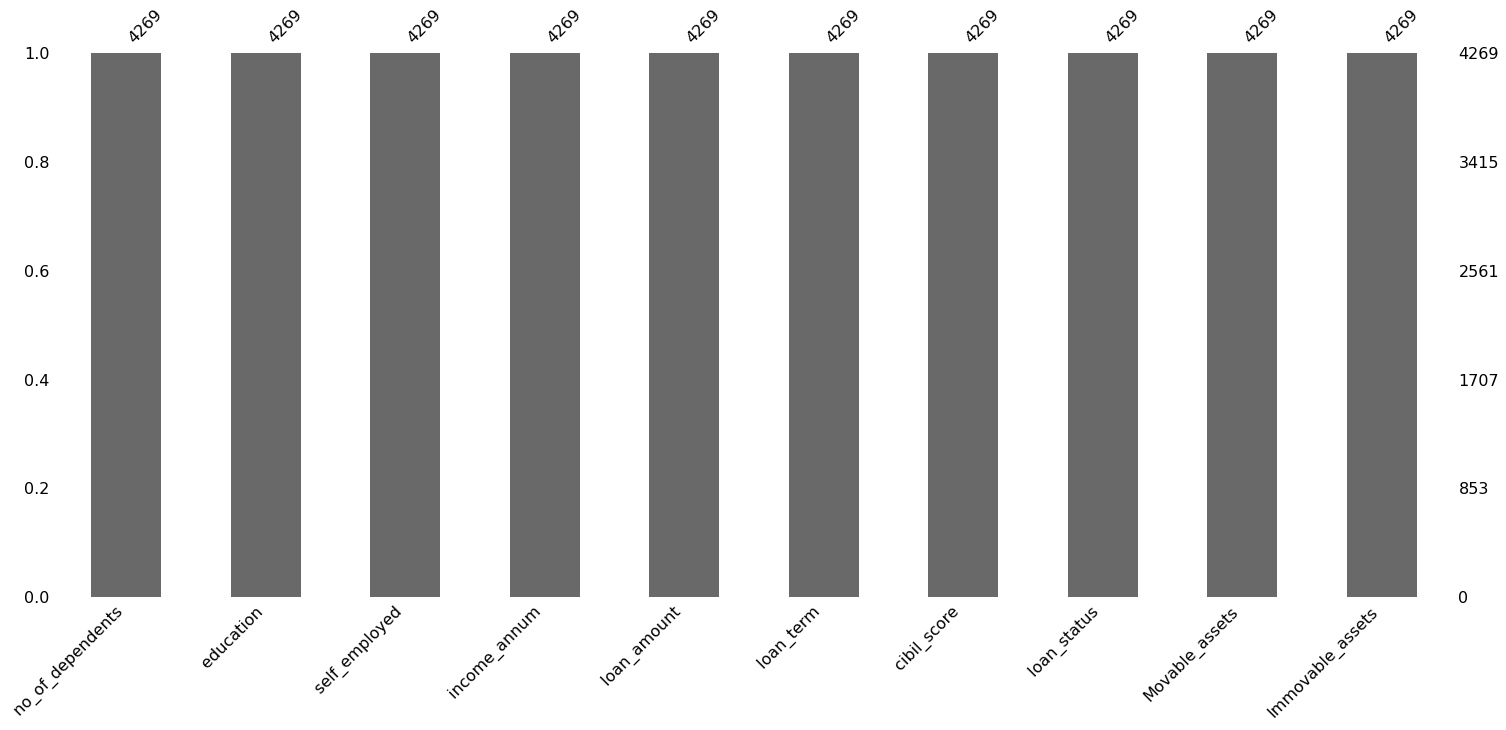

In [12]:
msno.bar(df)


In [13]:
# so on observation we can see that the null value is not present in Loan Approval Data Set dataset , as shown 

print()
df.isna().sum()

 no_of_dependents    0
 education           0
 self_employed       0
 income_annum        0
 loan_amount         0
 loan_term           0
 cibil_score         0
 loan_status         0
Movable_assets       0
Immovable_assets     0
dtype: int64

In [14]:
df.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,Movable_assets,Immovable_assets
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,2.010300e+07,1.244577e+07
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,1.183658e+07,9.232541e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,3.000000e+05,-1.000000e+05
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,1.000000e+07,4.900000e+06
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,1.960000e+07,1.060000e+07
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,2.910000e+07,1.820000e+07
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,5.380000e+07,4.660000e+07


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0    no_of_dependents  4269 non-null   int64 
 1    education         4269 non-null   object
 2    self_employed     4269 non-null   object
 3    income_annum      4269 non-null   int64 
 4    loan_amount       4269 non-null   int64 
 5    loan_term         4269 non-null   int64 
 6    cibil_score       4269 non-null   int64 
 7    loan_status       4269 non-null   object
 8   Movable_assets     4269 non-null   int64 
 9   Immovable_assets   4269 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 333.6+ KB


As we can see in the output. <br>

-> There are 4269 entries<br>
-> There are total 12 features (0 to 11) <br>
-> There are three types of datatype dtypes:  int64(9), object(3) <br>
-> It's Memory usage that is, memory usage: 400.3+ KB <br>
-> Also, We can check how many missing values available in the Non-Null Count column <br>

# **Exploratory Data Analysis**

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
# sns.set_style('dark')

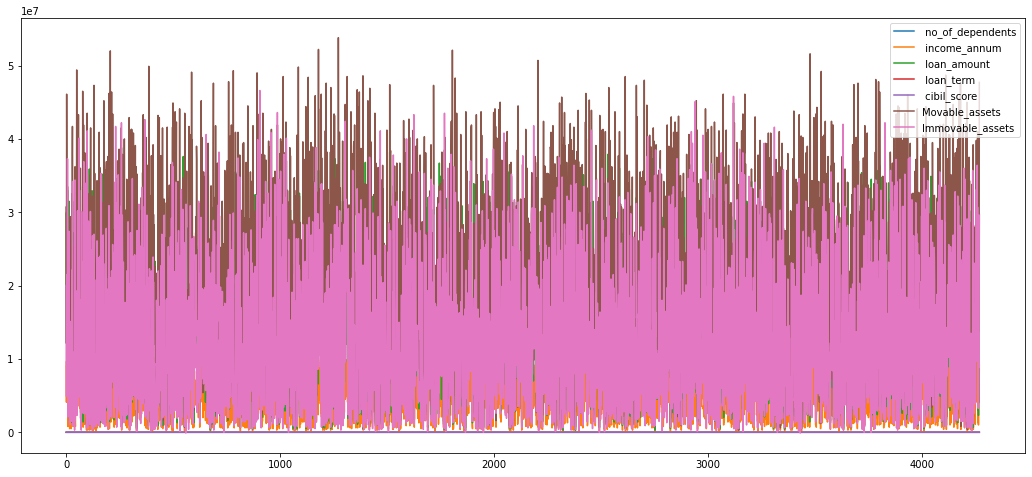

In [17]:
df.plot(figsize=(18, 8))

plt.show()

Text(0.5, 1.0, 'Number of Dependents')

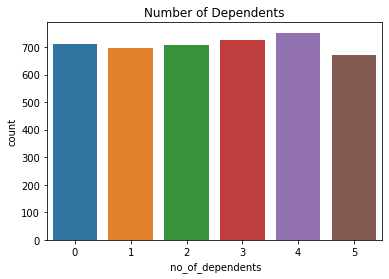

In [18]:
sns.countplot(x = ' no_of_dependents', data = df).set_title('Number of Dependents')


<AxesSubplot:xlabel=' no_of_dependents', ylabel='count'>

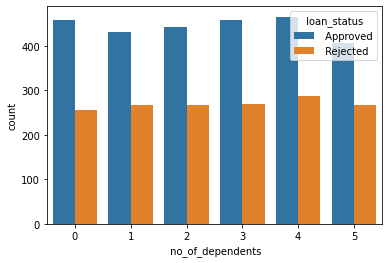

In [19]:
sns.countplot(x = ' no_of_dependents', data = df, hue = ' loan_status')


Text(0.5, 1.0, 'Self Employed')

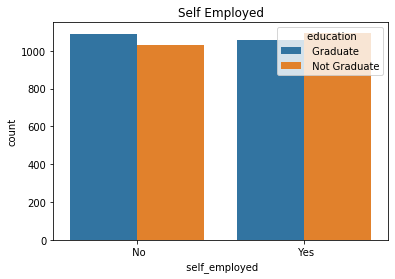

In [20]:
sns.countplot(x=' self_employed', data = df, hue = ' education').set_title('Self Employed')


<AxesSubplot:xlabel=' education', ylabel=' income_annum'>

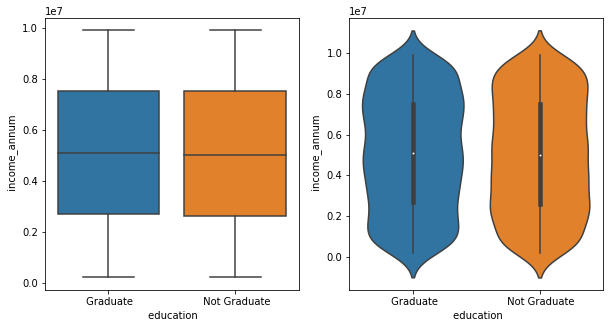

In [21]:
fig, ax = plt.subplots(1,2,figsize=(10, 5))
sns.boxplot(x = ' education', y = ' income_annum', data = df, ax=ax[0])
sns.violinplot(x = ' education', y = ' income_annum', data = df, ax=ax[1])

Text(0.5, 1.0, 'Loan Status by Education')

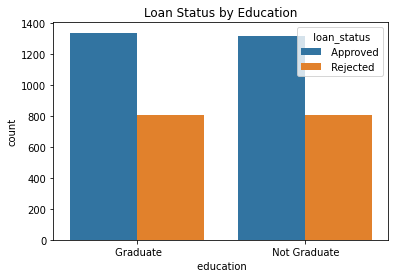

In [22]:
sns.countplot(x = ' education', hue = ' loan_status', data = df).set_title('Loan Status by Education')

Text(0.5, 1.0, 'Loan Amount vs. Loan Term')

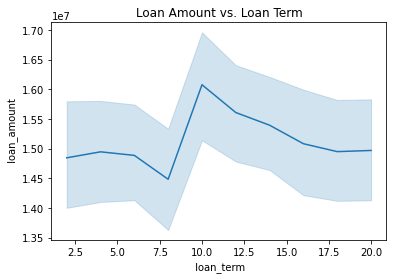

In [23]:
sns.lineplot(x = ' loan_term', y = ' loan_amount', data = df).set_title('Loan Amount vs. Loan Term')

In [24]:
df.head(1)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Movable_assets,Immovable_assets
0,2,Graduate,No,9600000,29900000,12,778,Approved,30700000,20000000


<AxesSubplot:xlabel=' loan_status', ylabel=' loan_amount'>

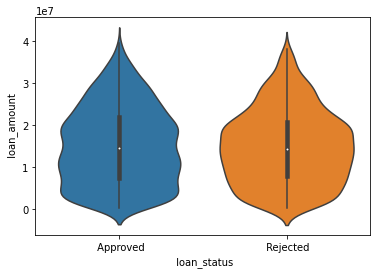

In [25]:
sns.violinplot(x=' loan_status', y=' loan_amount', data=df)

<AxesSubplot:xlabel=' loan_term', ylabel=' loan_amount'>

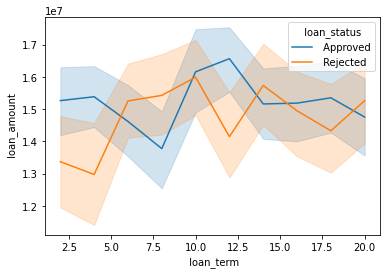

In [26]:
sns.lineplot(x=' loan_term', y=' loan_amount', data=df, hue=' loan_status')

cibil score range and meaning are as follows :- <br>  $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ 
![cibil score](image.png)

<AxesSubplot:xlabel=' cibil_score', ylabel='Count'>

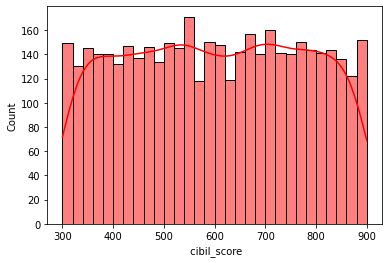

In [27]:
# viewing the distribution of the cibil_score column
sns.histplot(df[" cibil_score"],bins=30, kde=True, color='red')

<AxesSubplot:xlabel=' loan_status', ylabel=' cibil_score'>

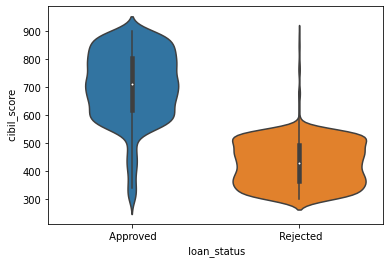

In [28]:
#cibil score vs loan 
sns.violinplot(x=' loan_status', y=' cibil_score', data=df)


Text(0.5, 1.0, 'Immovable_assets ')

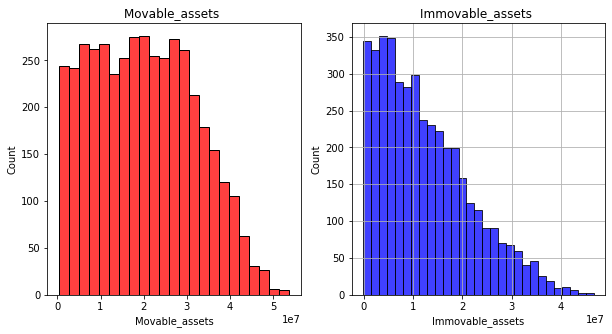

In [29]:
#Asset Distribution 

fig, ax = plt.subplots(1,2,figsize=(10,5))
plt.subplot(1, 2, 1)
sns.histplot(df['Movable_assets'], ax=ax[0], color='red')
plt.title("Movable_assets ")

plt.subplot(1, 2, 2)
plt.grid()
sns.histplot(df['Immovable_assets'], ax=ax[1], color='blue')
plt.title("Immovable_assets ")

<AxesSubplot:xlabel='Immovable_assets', ylabel='Count'>

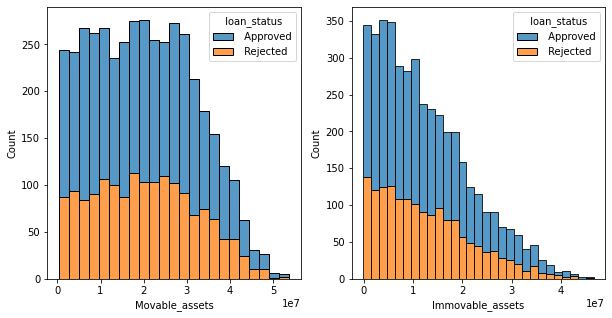

In [30]:
#assets vs loan 
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.histplot(x  = 'Movable_assets', data = df, ax=ax[0], hue = ' loan_status', multiple='stack')
sns.histplot(x =  'Immovable_assets', data = df, ax=ax[1], hue  = ' loan_status', multiple='stack')

In [31]:
df.head()


,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Movable_assets,Immovable_assets
0,2,Graduate,No,9600000,29900000,12,778,Approved,30700000,20000000
1,0,Not Graduate,Yes,4100000,12200000,8,417,Rejected,12100000,4900000
2,3,Graduate,No,9100000,29700000,20,506,Rejected,46100000,11600000
3,3,Graduate,No,8200000,30700000,8,467,Rejected,31200000,21500000
4,5,Not Graduate,Yes,9800000,24200000,20,382,Rejected,34400000,20600000


# **Data Preprocessing**

In [32]:
# Label Encoding
df[' education'] = df[' education'].map({' Not Graduate':0, ' Graduate':1})
df[' self_employed'] = df[' self_employed'].map({' No':0, ' Yes':1})
df[' loan_status'] = df[' loan_status'].map({' Rejected':0, ' Approved':1})

In [33]:
df.head()


,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Movable_assets,Immovable_assets
0,2,1,0,9600000,29900000,12,778,1,30700000,20000000
1,0,0,1,4100000,12200000,8,417,0,12100000,4900000
2,3,1,0,9100000,29700000,20,506,0,46100000,11600000
3,3,1,0,8200000,30700000,8,467,0,31200000,21500000
4,5,0,1,9800000,24200000,20,382,0,34400000,20600000


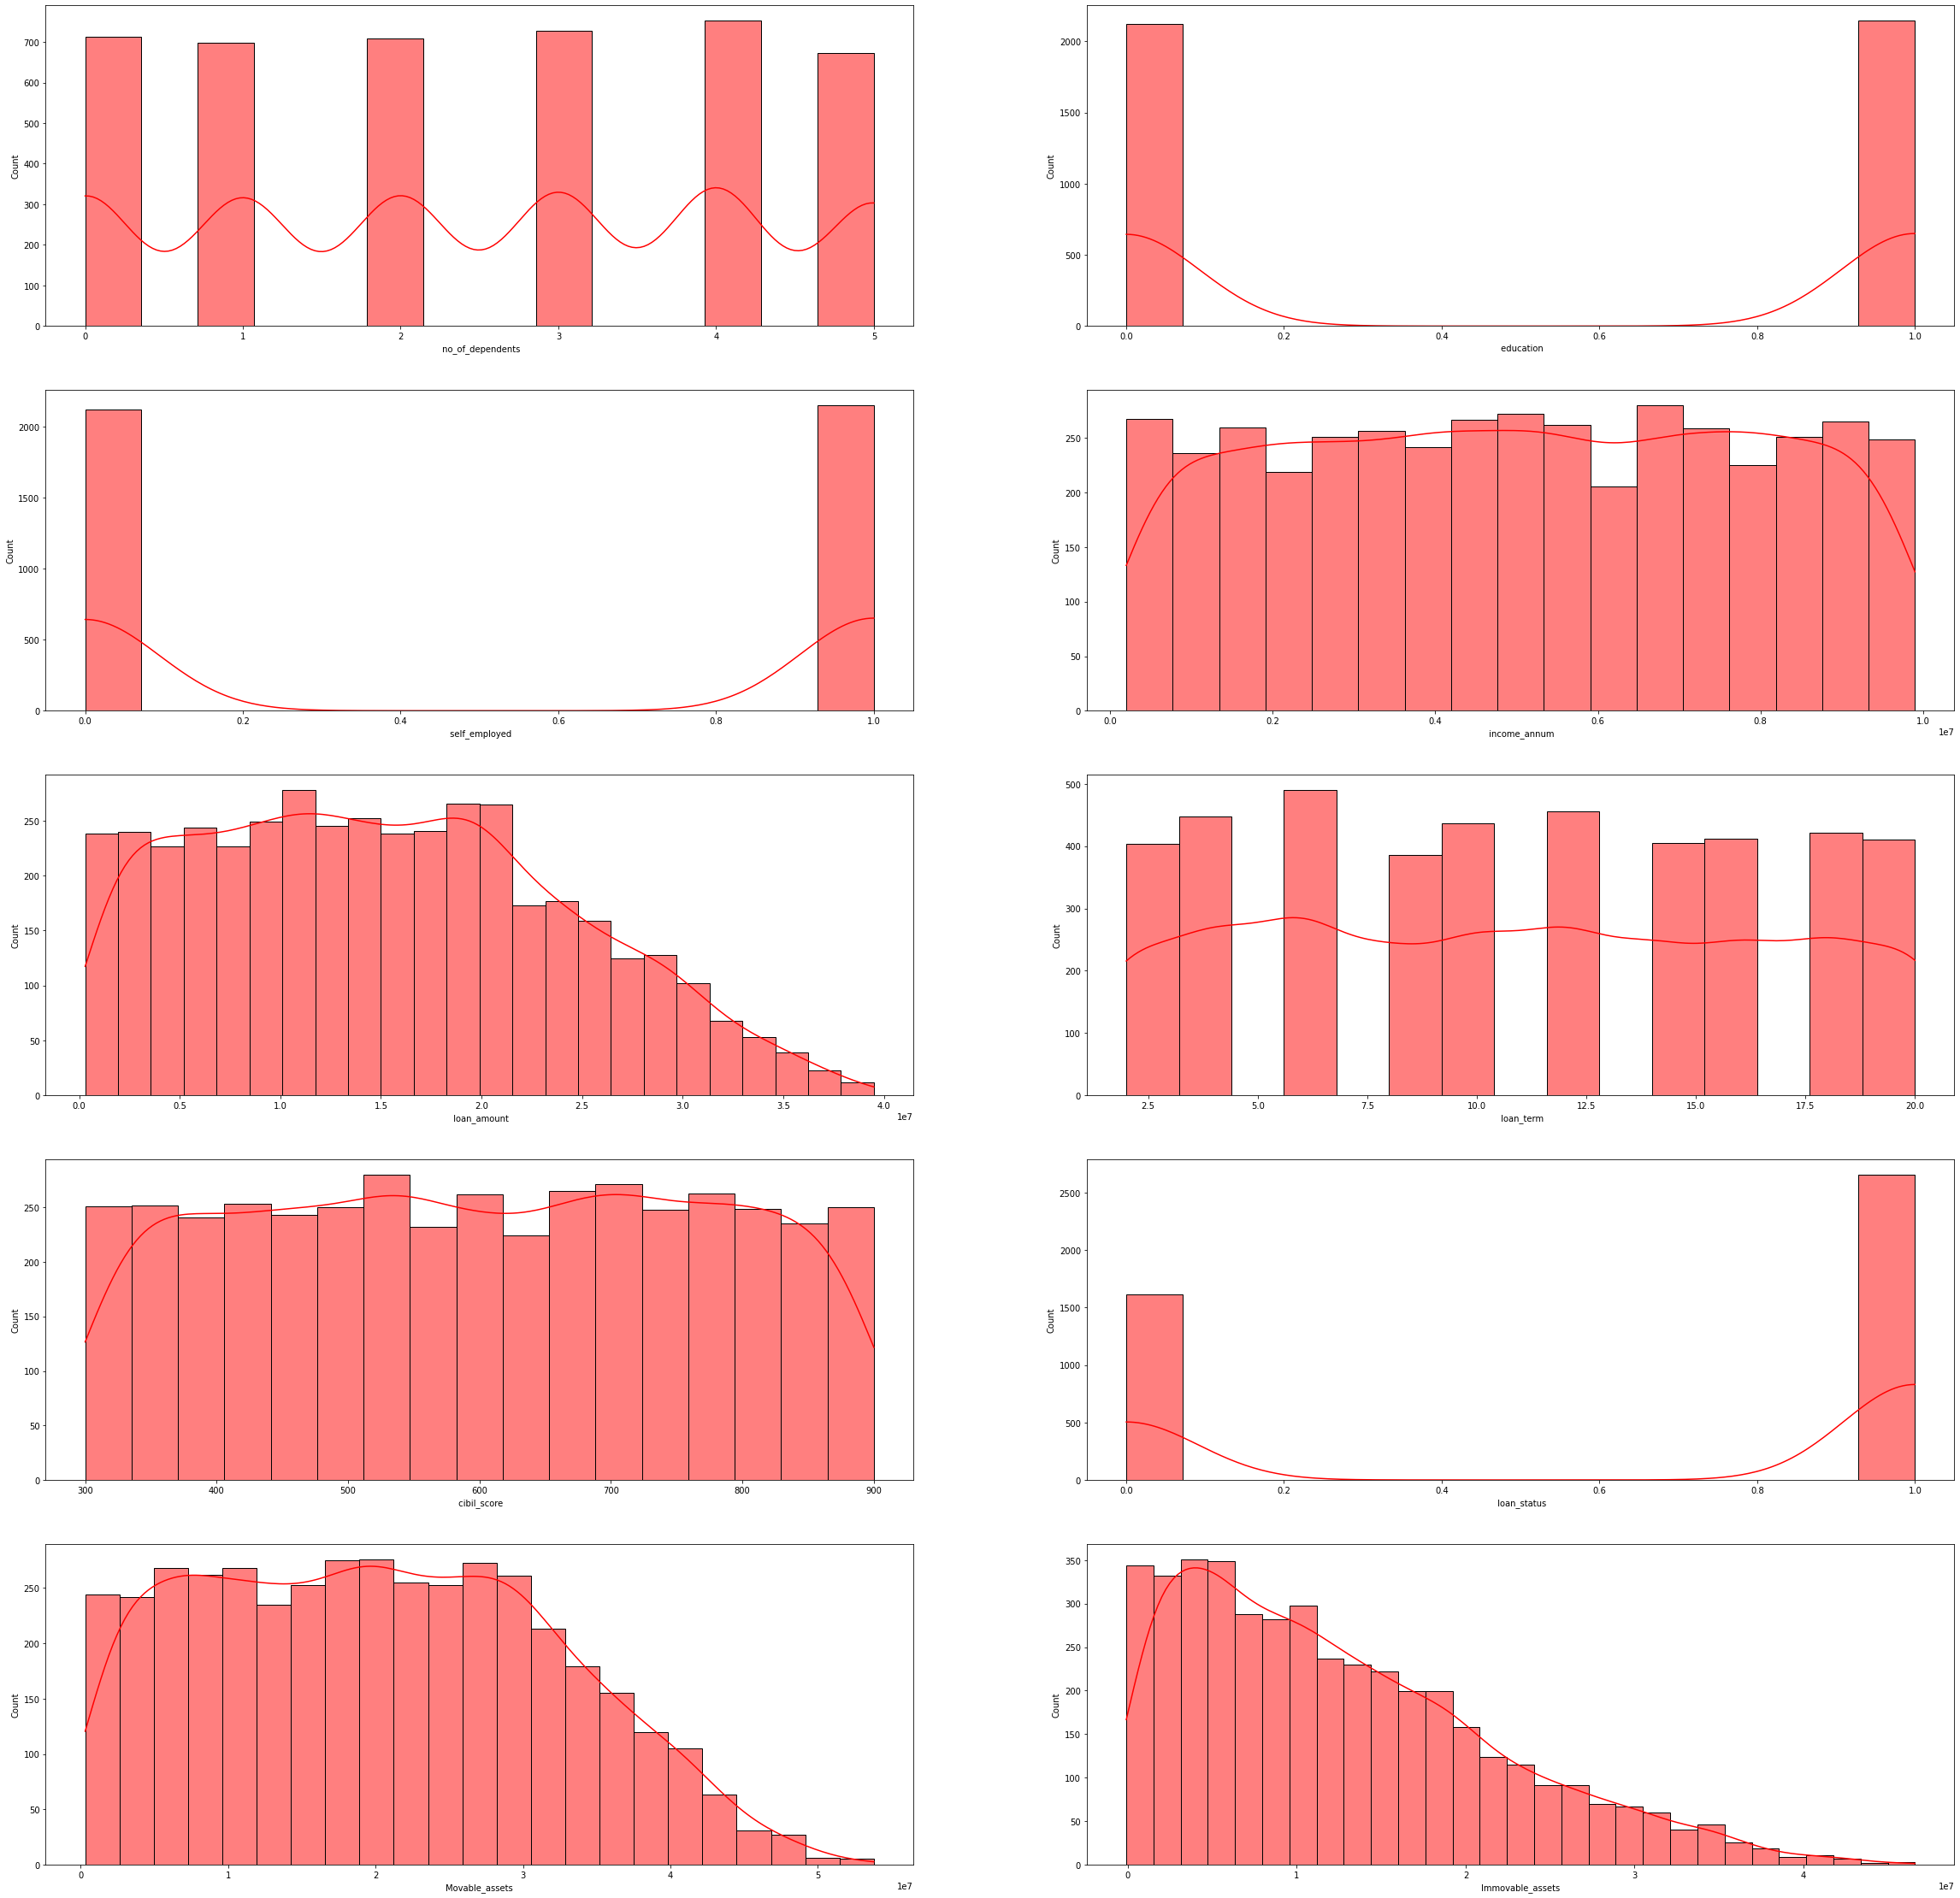

In [34]:
fig, axes = plt.subplots(nrows = 5, ncols = 2)    
axes = axes.flatten()         
fig.set_size_inches(40,40)

for ax, col in zip(axes, df.columns):
    sns.histplot(df[col],kde=True, color='red', ax = ax)

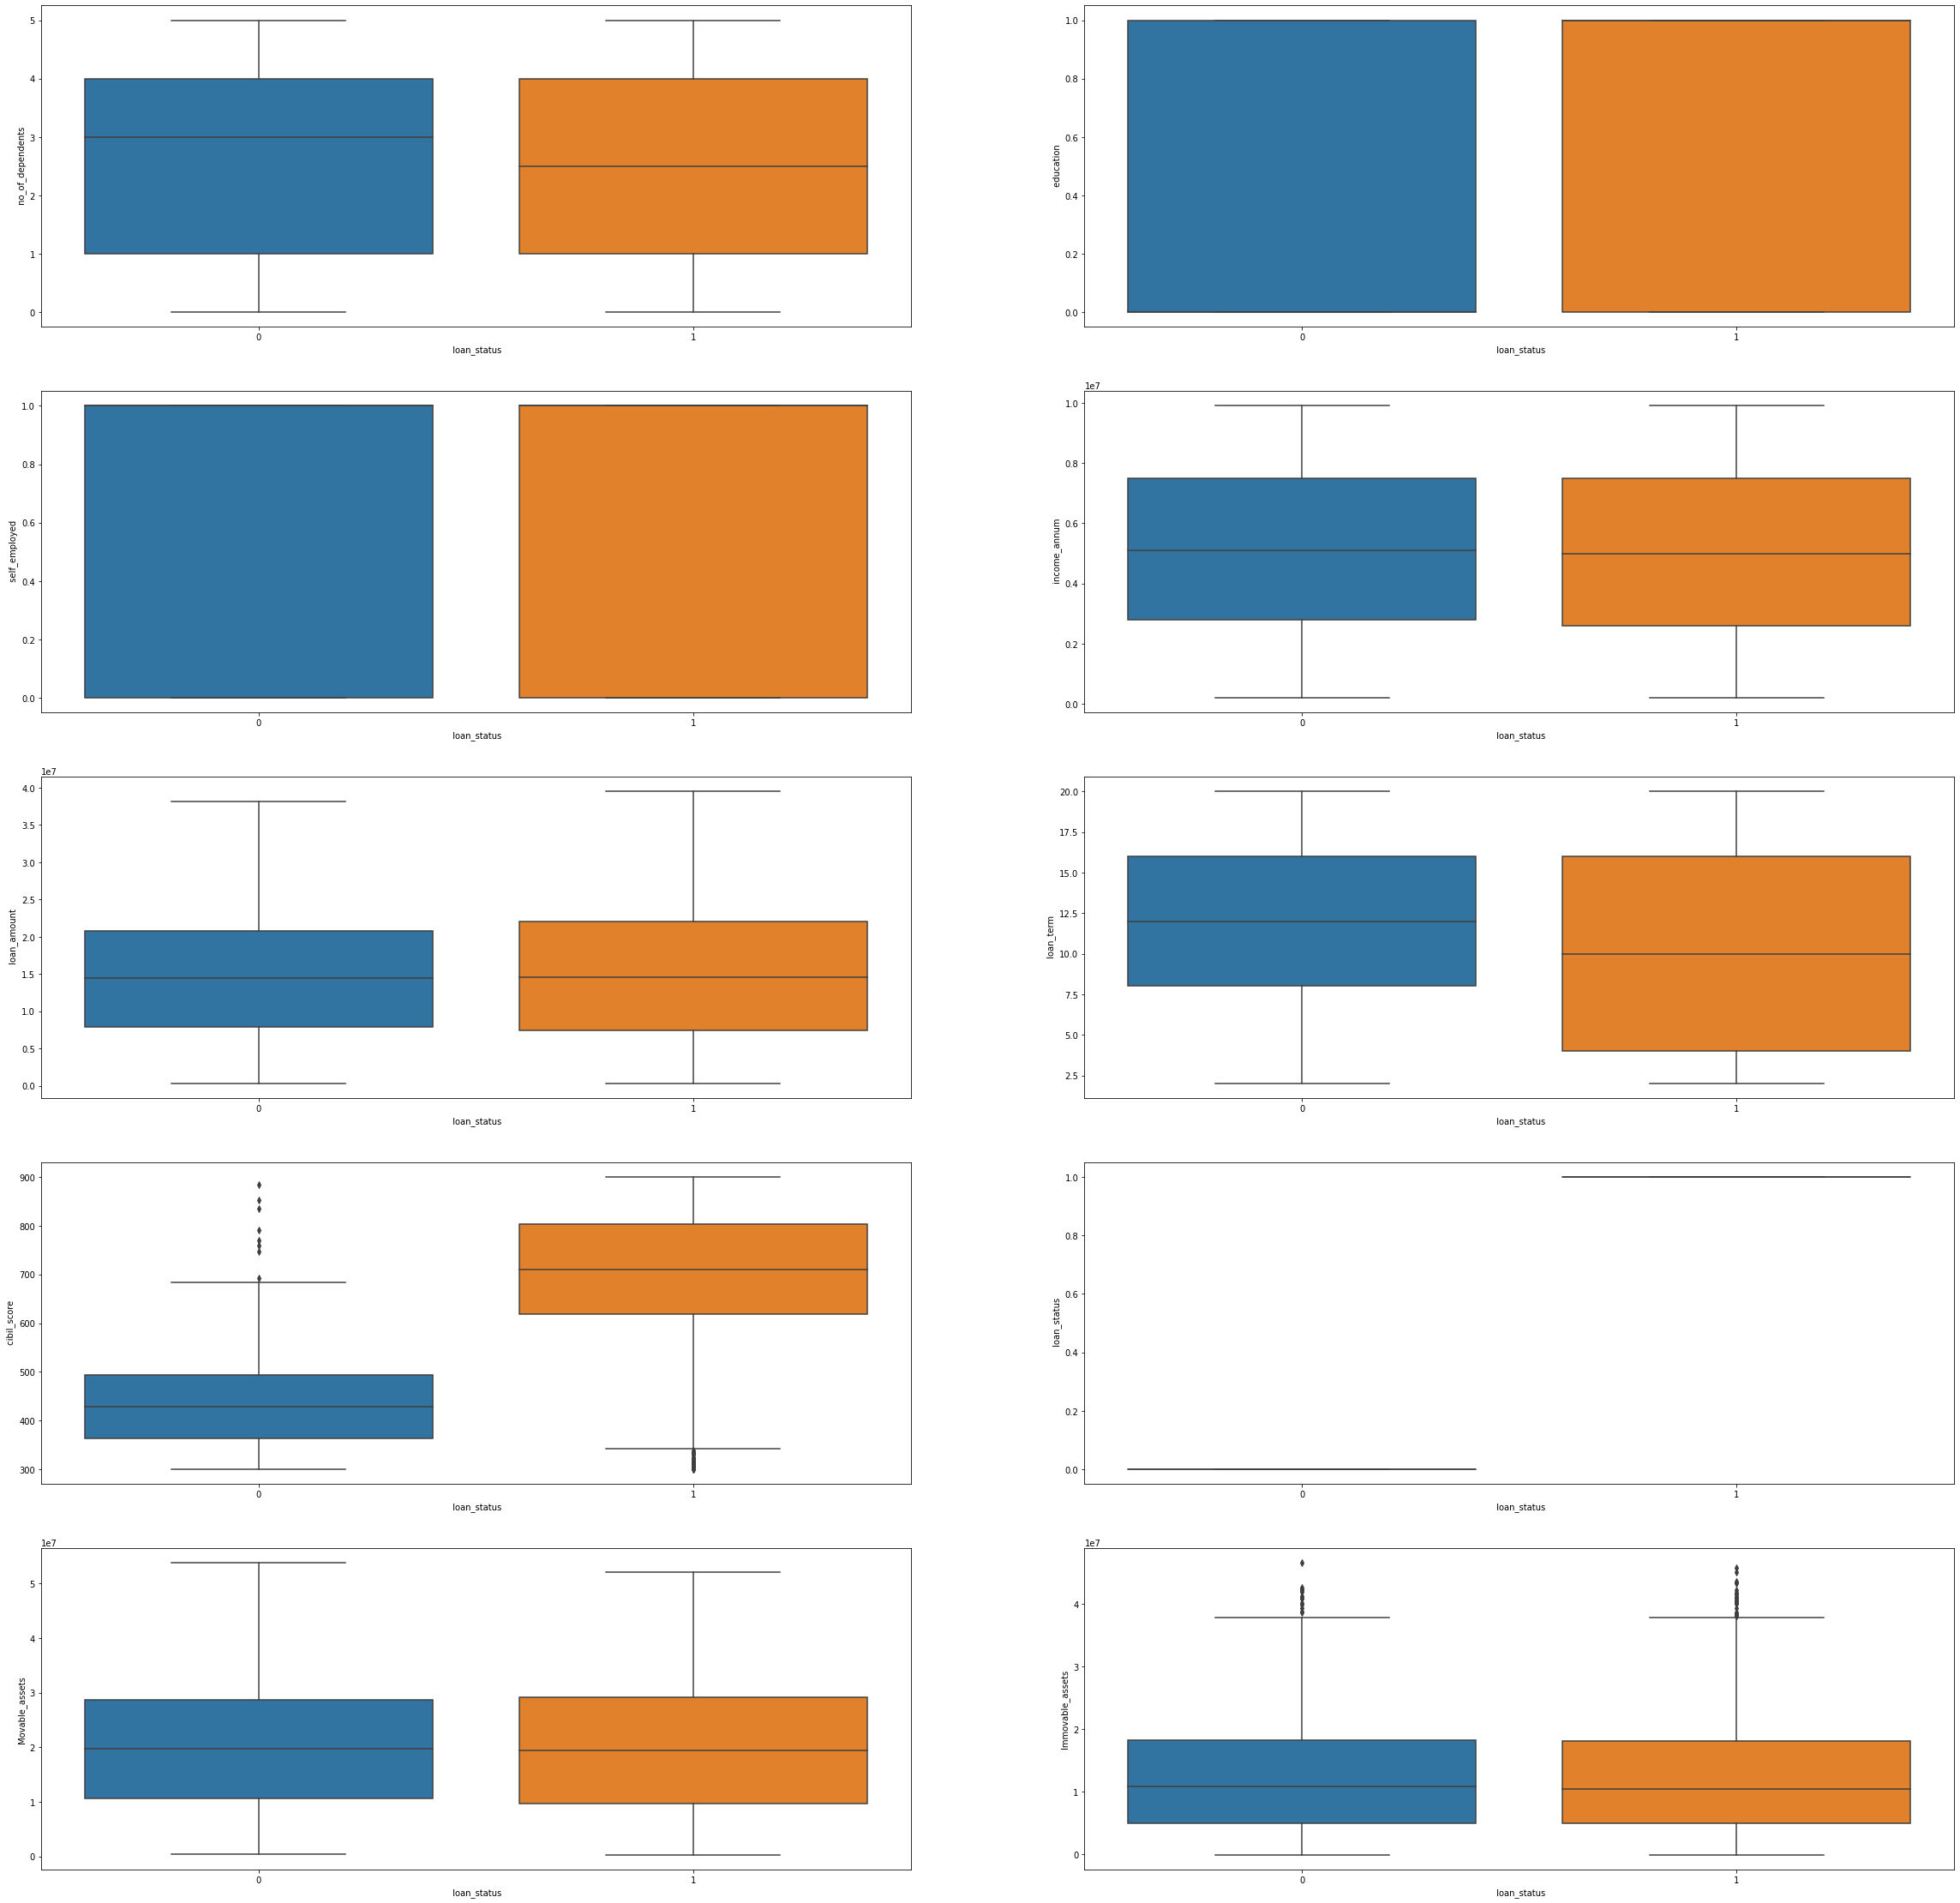

In [35]:
fig, axes = plt.subplots(nrows = 5, ncols = 2)    
axes = axes.flatten()         
fig.set_size_inches(40,40)

for ax, col in zip(axes, df.columns):
  sns.boxplot(x=' loan_status',y=df[col], ax = ax , data=df)

In [36]:
import warnings

# Suppress warnings within this code block
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

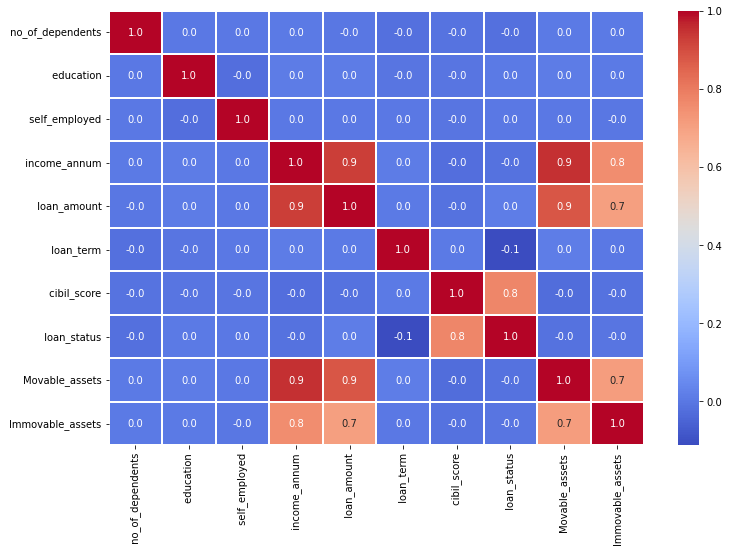

In [37]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)
plt.show()

The heatmap of correlation values shows several strong connections:

1. **Movable Assets and Immovable Assets**
2. **Income and Movable Assets**
3. **Income and Immovable Assets**
4. **Movable Assets and Loan Amount**
5. **Immovable Assets and Loan Amount**
6. **Loan Status and Cibil Score**
7. **Loan Amount and Income**

Text(0.5, 1.0, 'Immovable_assets vs loan_amount')

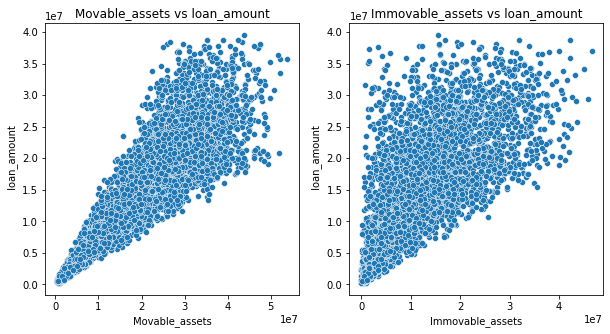

In [38]:
# asset vs loan 

fig, ax = plt.subplots(1,2,figsize=(10, 5))
sns.scatterplot(x='Movable_assets', y = ' loan_amount', data = df, ax=ax[0]).set_title('Movable_assets vs loan_amount')
sns.scatterplot(x='Immovable_assets', y = ' loan_amount', data = df, ax=ax[1]).set_title('Immovable_assets vs loan_amount')

<AxesSubplot:xlabel=' income_annum', ylabel=' loan_amount'>

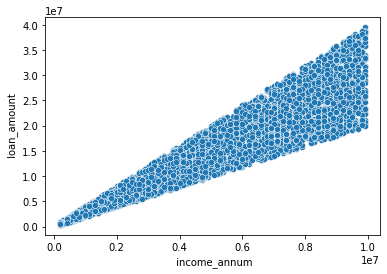

In [39]:
#loan ammount vs income 

sns.scatterplot(x=' income_annum', y = ' loan_amount', data = df)

# Machine learning model decision 


In [40]:
# importing all library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn import tree

In [41]:
# test-train split

X_train, X_test, y_train, y_test = train_test_split(df.drop(' loan_status', axis=1), df[' loan_status'], test_size=0.2, random_state=42)

In [42]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3415 entries, 1675 to 860
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0    no_of_dependents  3415 non-null   int64
 1    education         3415 non-null   int64
 2    self_employed     3415 non-null   int64
 3    income_annum      3415 non-null   int64
 4    loan_amount       3415 non-null   int64
 5    loan_term         3415 non-null   int64
 6    cibil_score       3415 non-null   int64
 7   Movable_assets     3415 non-null   int64
 8   Immovable_assets   3415 non-null   int64
dtypes: int64(9)
memory usage: 266.8 KB


1. logistic regression

In [43]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
lgr.fit(X_train, y_train)
predictions = lgr.predict(X_test)

In [44]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.6276346604215457


2. Support vector classification

In [45]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [46]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.6276346604215457


3. Decision tree Classification

In [47]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier() # Create decision tree object

In [48]:
dtree.fit(X_train, y_train) # Trainign the model using the training data

DecisionTreeClassifier()

In [49]:
dtree_pred = dtree.predict(X_test)

In [50]:
# Training Accuracy
dtree.score(X_train, y_train)

1.0

In [51]:
accuracy = accuracy_score(y_test, dtree_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9836065573770492


4. Random forrest classifier

In [52]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [53]:
rfc.fit(X_train, y_train) # Training the model using the training data

RandomForestClassifier()

In [54]:
# Predicting the Loan Approval Status
rfc_pred = rfc.predict(X_test)

In [55]:
# Calculate accuracy
accuracy = accuracy_score(y_test, rfc_pred)
print("Accuracy:", accuracy)

Accuracy: 0.977751756440281


# summary

## **Summary of Model Performance for Loan Approval Prediction**

When looking at different ways to predict if loans will be approved or not, we found that the Decision Tree model worked really well. It was accurate and could predict outcomes quite accurately. The Random Forest model also did a good job. <br>

However, the models called Support Vector Machine (SVM) and Logistic Regression didn't work well for this dataset. They didn't predict as accurately as the Decision Tree and Random Forest models.<br>

This tells us that picking the right model is really important. The Decision Tree and Random Forest models were great for this data, but SVM and Logistic Regression weren't a good fit.

since decision tree has more accuracy than the other models we are choosing decision tree algo as a model for our prediction of loan 